In [2]:
import numpy as np
import sys
sys.path.append("..")
from knn import KNearestNeighbours
from classification_tree import ClassificationTree
from logistic_regression import SoftmaxRegression
from preprocessing import MinMaxScaler, SimpleImputer, OrdinalEncoder, OneHotEncoder, PreprocessingPipeline, LabelEncoder
from train_test_split import train_test_split 

congress_data = np.genfromtxt("../datasets/congressvotes84/house-votes-84-data.csv",delimiter=",",dtype=str)
print(congress_data)

def convert_data(value):
    if value == '?':
        return np.nan  # Replace '?' with NaN for numerical columns
    else:
        try:
            return float(value)  # Convert to float if possible
        except ValueError:
            return value  # Keep the string value for categorical columns

# Apply the converter function to each column
for i in range(congress_data.shape[1]):
    congress_data[:, i] = [convert_data(value) for value in congress_data[:, i]]

print(congress_data)

[['republican' 'n' 'y' ... 'y' 'n' 'y']
 ['republican' 'n' 'y' ... 'y' 'n' '?']
 ['democrat' '?' 'y' ... 'y' 'n' 'n']
 ...
 ['republican' 'n' '?' ... 'y' 'n' 'y']
 ['republican' 'n' 'n' ... 'y' 'n' 'y']
 ['republican' 'n' 'y' ... 'y' '?' 'n']]
[['republican' 'n' 'y' ... 'y' 'n' 'y']
 ['republican' 'n' 'y' ... 'y' 'n' 'nan']
 ['democrat' 'nan' 'y' ... 'y' 'n' 'n']
 ...
 ['republican' 'n' 'nan' ... 'y' 'n' 'y']
 ['republican' 'n' 'n' ... 'y' 'n' 'y']
 ['republican' 'n' 'y' ... 'y' 'nan' 'n']]


In [3]:
congress_X = congress_data[:, 1:]
congress_y = congress_data[:, :1]
print(congress_X[:5])
print(congress_y[:5])

[['n' 'y' 'n' 'y' 'y' 'y' 'n' 'n' 'n' 'y' 'nan' 'y' 'y' 'y' 'n' 'y']
 ['n' 'y' 'n' 'y' 'y' 'y' 'n' 'n' 'n' 'n' 'n' 'y' 'y' 'y' 'n' 'nan']
 ['nan' 'y' 'y' 'nan' 'y' 'y' 'n' 'n' 'n' 'n' 'y' 'n' 'y' 'y' 'n' 'n']
 ['n' 'y' 'y' 'n' 'nan' 'y' 'n' 'n' 'n' 'n' 'y' 'n' 'y' 'n' 'n' 'y']
 ['y' 'y' 'y' 'n' 'y' 'y' 'n' 'n' 'n' 'n' 'y' 'nan' 'y' 'y' 'y' 'y']]
[['republican']
 ['republican']
 ['democrat']
 ['democrat']
 ['democrat']]


In [4]:
imputer = SimpleImputer(strategy="most_frequent")
encoder = OneHotEncoder()
scaler = MinMaxScaler()
label_encoder = LabelEncoder()


#Create pipeline
pipeline_steps = [
    ('imputer', imputer),
    ('encoder', encoder),
    ('scaler', scaler)
]

pipeline = PreprocessingPipeline(pipeline_steps)
print(congress_data.shape)
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(congress_X, congress_y, test_size=0.2, seed=2709)

# Preprocess the training data
X_train_preprocessed = pipeline.fit_transform(X_train)
print(X_train_preprocessed)

# Preprocess the test data (using the same transformations as the training data)
X_test_preprocessed = pipeline.transform(X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)



(435, 17)
[[1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 0. 0.]]
(348, 16) (87, 16) (348, 1) (87, 1)


In [5]:
knn_congress = KNearestNeighbours(3)
tree_congress = ClassificationTree()
sm_congress = SoftmaxRegression()

models = [knn_congress, tree_congress, sm_congress]

for model in models:
    model.fit(X_train_preprocessed,y_train_encoded)
    ypred = model.predict(X_test_preprocessed)
    acc = np.mean(ypred == y_test_encoded)
    print(model.name," accuracy: ", acc)


KNN  accuracy:  0.9540229885057471
Decision Tree  accuracy:  0.9655172413793104
Softmax Regression  accuracy:  0.9425287356321839


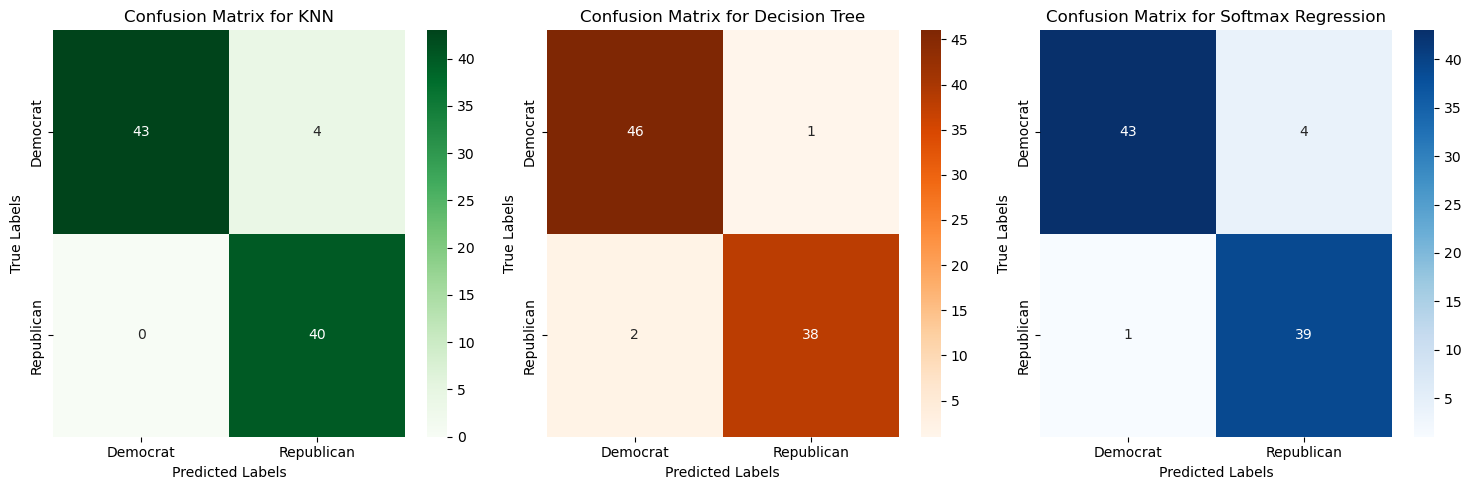

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define model names for display purposes
model_names = ['KNN', 'Decision Tree', 'Softmax Regression']

# Define color maps for each confusion matrix
cmaps = ['Greens', 'Oranges', 'Blues']

# Set up the matplotlib figure and axes, organized in a 1x3 grid
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterate over models, their names, and chosen color maps
for i, (model, name, cmap) in enumerate(zip(models, model_names, cmaps)):
    # Predict the test set
    y_pred = model.predict(X_test_preprocessed)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test_encoded, y_pred)
    
    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=['Democrat', 'Republican'], yticklabels=['Democrat', 'Republican'], ax=axes[i])
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')
    axes[i].set_title(f'Confusion Matrix for {model.name}')
    

plt.tight_layout()
plt.show()


In [7]:
titanic = np.genfromtxt("../datasets/Titanic-Dataset.csv",delimiter=",",skip_header=1,dtype=str)
print(titanic)

[['1' '0' '3' ... '7.25' '' 'S']
 ['2' '1' '1' ... '71.2833' 'C85' 'C']
 ['3' '1' '3' ... '7.925' '' 'S']
 ...
 ['889' '0' '3' ... '23.45' '' 'S']
 ['890' '1' '1' ... '30' 'C148' 'C']
 ['891' '0' '3' ... '7.75' '' 'Q']]


In [8]:
# Split the data into features (X) and target variable (y)
X = titanic[:, 2:]  # All columns except the first one (assuming 'Survived' is the first column)
y = titanic[:, 1]   # First column ('Survived')



In [9]:
categorical_columns = [3,7,9]  # Indices of categorical columns (Pclass, Name, Sex, Ticket, Cabin)
numerical_columns = [4, 5, 6, 8]      # Indices of numerical columns (Age, SibSp, Parch, Fare)
ordinal_columns = [0]                 # Indices of ordinal columns (Pclass)
print(X[0][categorical_columns])
print(X[0][numerical_columns])
#print(y[5])

['male' 'A/5 21171' '']
['22' '1' '0' '7.25']


In [10]:
from preprocessing import NumericConverter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, seed=2108)

# Preprocessing pipeline for categorical columns
categorical_imputer = SimpleImputer(strategy="most_frequent")
categorical_encoder = OneHotEncoder()
categorical_pipeline = PreprocessingPipeline([
    ("imputer", categorical_imputer),
    ("encoder", categorical_encoder)
])

# Preprocessing pipeline for numerical columns
numerical_imputer = SimpleImputer(strategy="mean")
numerical_converter = NumericConverter()
numerical_scaler = MinMaxScaler()
numerical_pipeline = PreprocessingPipeline([
    ("imputer", numerical_imputer),
    ("converter", numerical_converter),
    ("scaler", numerical_scaler)
])

# Preprocessing pipeline for ordinal columns
ordinal_imputer = SimpleImputer(strategy="most_frequent")
ordinal_encoder = OrdinalEncoder()
ordinal_pipeline = PreprocessingPipeline([
    ("imputer", ordinal_imputer),
    ("encoder", ordinal_encoder)
])

# Split the training data based on column types
X_train_categorical = X_train[:, categorical_columns]
X_train_numerical = X_train[:, numerical_columns]
X_train_ordinal = X_train[:, ordinal_columns]

# Preprocess the training data
X_train_categorical_preprocessed = categorical_pipeline.fit_transform(X_train_categorical)
X_train_numerical_preprocessed = numerical_pipeline.fit_transform(X_train_numerical)
X_train_ordinal_preprocessed = ordinal_pipeline.fit_transform(X_train_ordinal)

# Combine the preprocessed training data
X_train_preprocessed = np.hstack((X_train_categorical_preprocessed, X_train_numerical_preprocessed, X_train_ordinal_preprocessed))

# Split the test data based on column types
X_test_categorical = X_test[:, categorical_columns]
X_test_numerical = X_test[:, numerical_columns]
X_test_ordinal = X_test[:, ordinal_columns]

# Preprocess the test data using the fitted pipelines
X_test_categorical_preprocessed = categorical_pipeline.transform(X_test_categorical)
X_test_numerical_preprocessed = numerical_pipeline.transform(X_test_numerical)
X_test_ordinal_preprocessed = ordinal_pipeline.transform(X_test_ordinal)

# Combine the preprocessed test data
X_test_preprocessed = np.hstack((X_test_categorical_preprocessed, X_test_numerical_preprocessed, X_test_ordinal_preprocessed))

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [11]:
print(X_train_preprocessed.shape)
print(X_train_preprocessed[1])

(713, 691)
[1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         

In [12]:
from cross_validation import k_folds_accuracy_scores
knn_titanic = KNearestNeighbours(10)
tree_titanic = ClassificationTree()
sm_titanic = SoftmaxRegression()

print(k_folds_accuracy_scores(knn_titanic,X_train_preprocessed,y_train_encoded,10,2108))
print(k_folds_accuracy_scores(tree_titanic, X_train_preprocessed, y_train_encoded, 10, 2108))
print(k_folds_accuracy_scores(sm_titanic, X_train_preprocessed, y_train_encoded, 10, 2108))

[0.8591549295774648, 0.8309859154929577, 0.7746478873239436, 0.7605633802816901, 0.704225352112676, 0.8450704225352113, 0.7605633802816901, 0.9014084507042254, 0.8028169014084507, 0.8783783783783784]
[0.8732394366197183, 0.8873239436619719, 0.7746478873239436, 0.8309859154929577, 0.7887323943661971, 0.8450704225352113, 0.8309859154929577, 0.8873239436619719, 0.8028169014084507, 0.8513513513513513]
[0.8732394366197183, 0.7746478873239436, 0.7605633802816901, 0.7464788732394366, 0.6901408450704225, 0.8309859154929577, 0.7746478873239436, 0.8732394366197183, 0.8028169014084507, 0.7297297297297297]


In [13]:
from preprocessing import CombinedPreprocessor

# Define the column types
categorical_columns = [3,7,9]  # Specify the indices of categorical columns
numerical_columns = [4,5,6,8]    # Specify the indices of numerical columns
ordinal_columns = [0]      # Specify the indices of ordinal columns

# Create the individual preprocessing pipelines
categorical_pipeline = PreprocessingPipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder())
])

numerical_pipeline = PreprocessingPipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("converter", NumericConverter()),
    ("scaler", MinMaxScaler())
])

ordinal_pipeline = PreprocessingPipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

big_preprocessor = CombinedPreprocessor(categorical_pipeline, numerical_pipeline, ordinal_pipeline, categorical_columns, numerical_columns, ordinal_columns)

knn_titanic_prep = KNearestNeighbours(10)
tree_titanic_prep = ClassificationTree()
softmax_titanic_prep = SoftmaxRegression()

print(k_folds_accuracy_scores(knn_titanic_prep, X, y, 10, 2108, big_preprocessor))
print(k_folds_accuracy_scores(tree_titanic_prep, X, y, 10, 2108, big_preprocessor))
print(k_folds_accuracy_scores(softmax_titanic_prep, X, y, 10, 2108, big_preprocessor))


[0.7865168539325843, 0.7752808988764045, 0.8426966292134831, 0.7640449438202247, 0.8202247191011236, 0.8539325842696629, 0.8539325842696629, 0.7078651685393258, 0.8089887640449438, 0.8222222222222222]
[0.7865168539325843, 0.8202247191011236, 0.9101123595505618, 0.7865168539325843, 0.898876404494382, 0.8426966292134831, 0.8651685393258427, 0.7415730337078652, 0.8314606741573034, 0.8333333333333334]
[0.7528089887640449, 0.7640449438202247, 0.8202247191011236, 0.7528089887640449, 0.7865168539325843, 0.8426966292134831, 0.8539325842696629, 0.7078651685393258, 0.7865168539325843, 0.8]


In [9]:
import numpy as np
import sys
sys.path.append("..")
from preprocessing import load_dataset


X_titanic, y_titanic = load_dataset("../datasets/Titanic-Dataset.csv",1,',',missing_values=True,header=True)
print(X_titanic[:10])
print("y: ",y_titanic[:10])

[['1' '3' 'Braund, Mr. Owen Harris' 'male' '22' '1' '0' 'A/5 21171'
  '7.25' '' 'S']
 ['2' '1' 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)' 'female'
  '38' '1' '0' 'PC 17599' '71.2833' 'C85' 'C']
 ['3' '3' 'Heikkinen, Miss. Laina' 'female' '26' '0' '0'
  'STON/O2. 3101282' '7.925' '' 'S']
 ['4' '1' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)' 'female' '35'
  '1' '0' '113803' '53.1' 'C123' 'S']
 ['5' '3' 'Allen, Mr. William Henry' 'male' '35' '0' '0' '373450' '8.05'
  '' 'S']
 ['6' '3' 'Moran, Mr. James' 'male' '' '0' '0' '330877' '8.4583' '' 'Q']
 ['7' '1' 'McCarthy, Mr. Timothy J' 'male' '54' '0' '0' '17463' '51.8625'
  'E46' 'S']
 ['8' '3' 'Palsson, Master. Gosta Leonard' 'male' '2' '3' '1' '349909'
  '21.075' '' 'S']
 ['9' '3' 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)' 'female'
  '27' '0' '2' '347742' '11.1333' '' 'S']
 ['10' '2' 'Nasser, Mrs. Nicholas (Adele Achem)' 'female' '14' '1' '0'
  '237736' '30.0708' '' 'C']]
y:  ['0' '1' '1' '1' '0' '0' '0' '0' '1' '1']

/Users/nathan/anaconda3/lib/python3.11/site-packages/numpy/lib/arraysetops.py:733: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [10]:
categorical_columns = [3,7,9]  # Indices of categorical columns (Pclass, Name, Sex, Ticket, Cabin)
numerical_columns = [4, 5, 6, 8]      # Indices of numerical columns (Age, SibSp, Parch, Fare)
ordinal_columns = [0]                 # Indices of ordinal columns (Pclass)
print(X_titanic[0][categorical_columns])
print(X_titanic[0][numerical_columns])

['male' 'A/5 21171' '']
['22' '1' '0' '7.25']


In [18]:
from knn import KNearestNeighbours
from classification_tree import ClassificationTree
from logistic_regression import SoftmaxRegression
from preprocessing import MinMaxScaler, SimpleImputer, OrdinalEncoder, OneHotEncoder, PreprocessingPipeline, LabelEncoder, NumericConverter, CombinedPreprocessor
from train_test_split import train_test_split 
from cross_validation import k_folds_accuracy_scores
# Create the individual preprocessing pipelines
categorical_pipeline = PreprocessingPipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder())
])

numerical_pipeline = PreprocessingPipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("converter", NumericConverter()),
    ("scaler", MinMaxScaler())
])

ordinal_pipeline = PreprocessingPipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

preprocessor = CombinedPreprocessor(categorical_pipeline, numerical_pipeline, ordinal_pipeline, categorical_columns, numerical_columns, ordinal_columns)

X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.2, seed=2108)
X_train_encoded = preprocessor.fit_transform(X_train)

print(X_train_encoded.shape)

(713, 691)
